In [209]:
import torch
import torchvision
import torchvision.transforms as transforms
import os

In [213]:
tf = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(256),
    transforms.RandomAffine(degrees=90),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225] )
    ])

In [214]:
db = torchvision.datasets.ImageFolder(root='cats', transform=tf)

In [215]:
print(db.class_to_idx)

{'lastik': 0, 'other': 1}


In [216]:
batch_size = 32
loader = torch.utils.data.DataLoader(db, batch_size=batch_size, shuffle=True, num_workers=6)
classes = ('lastik', 'other')

In [217]:
train_set, test_set = torch.utils.data.random_split(db, [0.7, 0.3], generator=torch.Generator().manual_seed(42))
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=6)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=True, num_workers=6)
test_len = print(len(test_set))

463


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


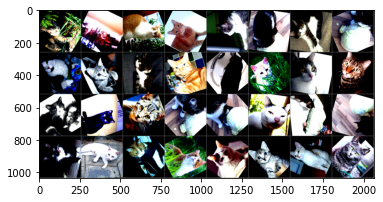

other other other other lastik lastik lastik lastik other other lastik other lastik other lastik other other other other lastik lastik other lastik lastik other other other other other other other other


In [219]:
import matplotlib.pyplot as plt
import numpy as np

# функция для показа изображения
def imshow(img):
    img = img  / 2  + 0.5    
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# получаем несколько случайных обучающих изображений
dataiter = iter(train_loader)
images, labels = next(dataiter)

# показать изображения
imshow(torchvision.utils.make_grid(images))
# показать лейблы изображений
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [220]:
import torch.nn as nn
import torch.nn.functional as F
from torch import flatten

In [221]:
# Инициализация модели
class Net_1(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) # (in_channels, out_channels, kernel_size) Применяет 2D-свертку к входному сигналу, состоящему из нескольких входных плоскостей.
        self.pool = nn.MaxPool2d(2, 2) # (kernel_size, stride) Применяет MaxPool2D-объединение к входному сигналу, состоящему из нескольких входных плоскостей.
        self.conv2 = nn.Conv2d(6, 16, 5) 
        self.fc1 = nn.Linear(59536, 120)# (in_features , out_features) Применяет линейное преобразование к входящим данным
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 2)

    # Это forward функция, которая определяет структуру сети.
    # Здесь мы принимаем только один вход, но можно использовать больше.
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) #(input, start_dim) Сглаживает input путем преобразования его в одномерный тензор.
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [222]:
# Инициализация модели
class Net_2(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 10, kernel_size=(5, 5)) # (in_channels, out_channels, kernel_size) Применяет 2D-свертку к входному сигналу, состоящему из нескольких входных плоскостей.
        self.pool = nn.MaxPool2d(2, 2) # (kernel_size, stride) Применяет MaxPool2D-объединение к входному сигналу, состоящему из нескольких входных плоскостей.
        self.conv2 = nn.Conv2d(10, 30, 5) 
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(111630, 500)# (in_features , out_features) Применяет линейное преобразование к входящим данным
        self.fc2 = nn.Linear(500, 2)

    # Это forward функция, которая определяет структуру сети.
    # Здесь мы принимаем только один вход, но можно использовать больше.
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) #(input, start_dim) Сглаживает input путем преобразования его в одномерный тензор.
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [223]:
# Инициализация модели
class Net_3(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 10, 5) # (in_channels, out_channels, kernel_size) Применяет 2D-свертку к входному сигналу, состоящему из нескольких входных плоскостей.
        self.pool = nn.MaxPool2d(2, 2) # (kernel_size, stride) Применяет MaxPool2D-объединение к входному сигналу, состоящему из нескольких входных плоскостей.
        self.conv2 = nn.Conv2d(10, 20, 5) 
        self.pool = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(20, 30, 5) 
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(23520, 120)# (in_features , out_features) Применяет линейное преобразование к входящим данным
        self.fc2 = nn.Linear(120, 80)
        self.fc3 = nn.Linear(80, 2)

    # Это forward функция, которая определяет структуру сети.
    # Здесь мы принимаем только один вход, но можно использовать больше.
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = torch.flatten(x, 1) #(input, start_dim) Сглаживает input путем преобразования его в одномерный тензор.
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [224]:
# Инициализация модели
class Net_4(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 10, 5) # (in_channels, out_channels, kernel_size) Применяет 2D-свертку к входному сигналу, состоящему из нескольких входных плоскостей.
        self.pool = nn.MaxPool2d(2, 2) # (kernel_size, stride) Применяет MaxPool2D-объединение к входному сигналу, состоящему из нескольких входных плоскостей.
        self.fc1 = nn.Linear(158760, 500)# (in_features , out_features) Применяет линейное преобразование к входящим данным
        self.fc2 = nn.Linear(500, 200)
        self.fc3 = nn.Linear(200, 100)
        self.fc4 = nn.Linear(100, 2)
        self.fc5 = nn.Softmax(dim = 1)

    # Это forward функция, которая определяет структуру сети.
    # Здесь мы принимаем только один вход, но можно использовать больше.
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = torch.flatten(x, 1) #(input, start_dim) Сглаживает input путем преобразования его в одномерный тензор.
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        x = self.fc5(x)
        
        return x

In [225]:
nets = [] 
nets.append(Net_1())
nets.append(Net_2())
nets.append(Net_3())
nets.append(Net_4())

In [226]:
def get_n_params(model):
    pp=0
    for p in list(model.parameters()):
        nn=1
        for s in list(p.size()):
            nn = nn*s
        pp += nn
    return pp

In [227]:
import torch.optim as optim
# Критерии полезны для обучения нейронной сети. Учитывая входные данные и цель, они вычисляют градиент в соответствии с заданной функцией потерь
criterion = nn.CrossEntropyLoss()
# torch.optim - это пакет, реализующий различные алгоритмы оптимизации. Наиболее часто используемые методы уже поддерживаются, 
# а интерфейс достаточно общий, так что более сложные методы могут быть также легко интегрированы в будущем.

In [228]:
for i, net in enumerate(nets):
    print(f'---- net {i} ----')
    print(type(net))
    optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

    for epoch in range(4):  # многократное прохождение по набору данных
        running_loss = 0.0
        for i, data in enumerate(train_loader, 0):
            # получаем входные данные; данные - это список [inputs, labels].
            inputs, labels = data

            # обнуляем градиенты параметров
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # вывести статистику обучения
            running_loss += loss.item()
            if i % 10 == 9:    # вывести каждые 300 mini-batches
                print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 10:.3f}')
                running_loss = 0.0
    print('Finished Training')

    #Сохранение нашей модели
    PATH = './cats_net_'+ str(i) +'.pth'
    torch.save(net.state_dict(), PATH)

    dataiter = iter(test_loader)
    images, labels = next(dataiter)
    outputs = net(images)

    correct = 0
    total = 0
    # поскольку мы не обучаемся, нам не нужно вычислять градиенты для наших выходов
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            # рассчитываем выходные данные, пропуская изображения через сеть
            outputs = net(images)
            # класс с наибольшей мощностью - это то, что мы выбираем в качестве предсказания
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f'Accuracy of the network on the {test_len} test images: {100 * correct // total} %')

    # Подготовка
    correct_pred = {classname: 0 for classname in classes}
    total_pred = {classname: 0 for classname in classes}

    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            outputs = net(images)
            _, predictions = torch.max(outputs, 1)
            # собираем правильные прогнозы для каждого класса
            for label, prediction in zip(labels, predictions):
                if label == prediction:
                    correct_pred[classes[label]] += 1
                total_pred[classes[label]] += 1


    # Выводим точность на каждом классе
    for classname, correct_count in correct_pred.items():
        accuracy = 100 * float(correct_count) / total_pred[classname]
        print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

    param_count = get_n_params(net)
    print(f'Model size: {param_count} parametres')

---- net 0 ----
<class '__main__.Net_1'>
[1,    10] loss: 0.692
[1,    20] loss: 0.683
[1,    30] loss: 0.670
[2,    10] loss: 0.653
[2,    20] loss: 0.626
[2,    30] loss: 0.624
[3,    10] loss: 0.584
[3,    20] loss: 0.595
[3,    30] loss: 0.565
[4,    10] loss: 0.520
[4,    20] loss: 0.564
[4,    30] loss: 0.518
Finished Training
Accuracy of the network on the None test images: 74 %
Accuracy for class: lastik is 90.1 %
Accuracy for class: other is 61.7 %
Model size: 7157646 parametres
---- net 1 ----
<class '__main__.Net_2'>
[1,    10] loss: 0.683
[1,    20] loss: 0.660
[1,    30] loss: 0.593
[2,    10] loss: 0.604
[2,    20] loss: 0.578
[2,    30] loss: 0.549
[3,    10] loss: 0.560
[3,    20] loss: 0.546
[3,    30] loss: 0.498
[4,    10] loss: 0.439
[4,    20] loss: 0.453
[4,    30] loss: 0.519
Finished Training
Accuracy of the network on the None test images: 76 %
Accuracy for class: lastik is 93.3 %
Accuracy for class: other is 58.8 %
Model size: 55824792 parametres
---- net 2 --